In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('data/final/relabel/train_data.csv')
train_data

,Type,Rate,Review,label,Relabel
0,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLUE,1,무슨 2군데나 터진 불량품을 보내나요? 검수 안하나요? 너무나도 어이없어서 교환 환...,0.0,부정
1,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,맨살에 입어도 부드럽고 재질은 되게 좋아요두께감이 두꺼워 초겨울 쯤 돼야 입을 거 ...,1.0,긍정
2,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,"진짜 완전 부드럽고 핏 너무 이쁘게 나와요.요즘 날씨에 실내에선 단품, 밖에선 이너...",1.0,긍정
3,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 GREEN,5,깡스타일리스트 콜라보는 항상 믿을만 합니다. 옷 진짜 두껍고 색깔도 예쁘고 착용감도...,1.0,긍정
4,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,생각보다 두껍고 무겁네요 마침 날씨도 쌀쌀해져서 딱인듯,1.0,부정
...,...,...,...,...,...
126358,없음,3,다른 색상에 비해 짧은 검정색.. 기장 생각 안하고 기냥 기장 큰거로 가는게 베스트.,NaN,부정
126359,없음,3,가격대비 비싼거 같아요 보세랑 다를게 없네요 흑,NaN,부정
126360,없음,3,제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요,NaN,부정
126361,없음,3,카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요,NaN,부정


In [3]:
len(train_data['Review'].unique())

126350

In [4]:
train_data = train_data.drop_duplicates(subset = 'Review', keep = 'first', ignore_index = True)
train_data

,Type,Rate,Review,label,Relabel
0,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLUE,1,무슨 2군데나 터진 불량품을 보내나요? 검수 안하나요? 너무나도 어이없어서 교환 환...,0.0,부정
1,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,맨살에 입어도 부드럽고 재질은 되게 좋아요두께감이 두꺼워 초겨울 쯤 돼야 입을 거 ...,1.0,긍정
2,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,"진짜 완전 부드럽고 핏 너무 이쁘게 나와요.요즘 날씨에 실내에선 단품, 밖에선 이너...",1.0,긍정
3,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 GREEN,5,깡스타일리스트 콜라보는 항상 믿을만 합니다. 옷 진짜 두껍고 색깔도 예쁘고 착용감도...,1.0,긍정
4,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,생각보다 두껍고 무겁네요 마침 날씨도 쌀쌀해져서 딱인듯,1.0,부정
...,...,...,...,...,...
126345,없음,3,다른 색상에 비해 짧은 검정색.. 기장 생각 안하고 기냥 기장 큰거로 가는게 베스트.,NaN,부정
126346,없음,3,가격대비 비싼거 같아요 보세랑 다를게 없네요 흑,NaN,부정
126347,없음,3,제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요,NaN,부정
126348,없음,3,카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요,NaN,부정


In [5]:
train_data['Relabel'].value_counts()

긍정    9201
부정    3813
Name: Relabel, dtype: int64

In [6]:
print(9201 / 3813)
print("6.5: 3.5 일 경우 " + str(9201 - (3813 * 6.5/3.5)) + " 개 삭제 필요")
print(3813 + 9201 - 2119)
print("6: 4 일 경우 " + str(9201- (3813 * 6/4)) + " 개 삭제 필요")
print(3813 + 9201 - 3482)

# 6.5: 3.5 = 긍정 : 부정
# 이대로 하는 것이 맞을까???

2.4130605822187254
6.5: 3.5 일 경우 2119.7142857142853 개 삭제 필요
10895
6: 4 일 경우 3481.5 개 삭제 필요
9532


In [7]:
print(10000 - 3813)
print(3813 / 6187)

6187
0.6162922256343947


In [8]:
print(9201 - 2120)

7081


* 2120개 삭제로 결정!

In [9]:
train_data_긍정 = train_data[train_data['Relabel'] =='긍정']
train_data_부정 = train_data[train_data['Relabel'] =='부정']

In [10]:
train_data_긍정

,Type,Rate,Review,label,Relabel
1,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,맨살에 입어도 부드럽고 재질은 되게 좋아요두께감이 두꺼워 초겨울 쯤 돼야 입을 거 ...,1.0,긍정
2,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,"진짜 완전 부드럽고 핏 너무 이쁘게 나와요.요즘 날씨에 실내에선 단품, 밖에선 이너...",1.0,긍정
3,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 GREEN,5,깡스타일리스트 콜라보는 항상 믿을만 합니다. 옷 진짜 두껍고 색깔도 예쁘고 착용감도...,1.0,긍정
5,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 PINK,5,"색상은 알아듣기 쉽게 딸기우유, 오피스텔 상가 분양할 때 나눠주는 분홍행주 컬러예요...",1.0,긍정
6,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,옷도 예쁘고 콜라보제품이라 저렴하게 잘 산거같습니다 ㅎㅎ,1.0,긍정
...,...,...,...,...,...
125744,베이식 블레이저 [블랙],5,무텐블레이져 느낌 깰~~~끔하고요완벽한 기장이구요기본템으로 강추,1.0,긍정
125745,베이식 블레이저 [블랙],5,옷도 이쁘고 진짜 가성비 최고네요!! 블레이저 없어서 이번에 샀는데 정말 잘 산거같...,1.0,긍정
125782,베이식 블레이저 [블랙],5,거울로 봤을때는 괜찮았는데 찍어보니 티셔츠 색깔이 조금 이상하네요.구래도 블레이져는...,1.0,긍정
125839,베이식 블레이저 [블랙],5,가격 생각하면 진짜 최고인거같아요블레이져가 없어서 저렴한걸로 구매해봤는데 넘 좋네요,1.0,긍정


In [11]:
train_data_부정

,Type,Rate,Review,label,Relabel
0,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLUE,1,무슨 2군데나 터진 불량품을 보내나요? 검수 안하나요? 너무나도 어이없어서 교환 환...,0.0,부정
4,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,생각보다 두껍고 무겁네요 마침 날씨도 쌀쌀해져서 딱인듯,1.0,부정
8,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,4,"내구성이 상당히 좋은 니트라고 생각됩니다. 목부분, 손목, 허리 부분 시보리가 상당...",1.0,부정
10,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 YELLOW,1,마지막으로 믿고 유튜버 콜라보 샀는데 진짜 깡형은 믿거할예정 세탁 후 줄어듬이 젤...,0.0,부정
11,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 CINNAMON,5,입었을 때 중량이 생각보다 무겁습니다두껍기도 두꺼워서 단품으로 입거나 오버사이즈의 ...,1.0,부정
...,...,...,...,...,...
126345,없음,3,다른 색상에 비해 짧은 검정색.. 기장 생각 안하고 기냥 기장 큰거로 가는게 베스트.,NaN,부정
126346,없음,3,가격대비 비싼거 같아요 보세랑 다를게 없네요 흑,NaN,부정
126347,없음,3,제가 비율이 안 좋아서 그런가 저는 다리가 짧아 보이더라고요,NaN,부정
126348,없음,3,카키색이랑 같이 시켰는데 검정색은 누가 입은거처럼 주름이 많이 잡혀서 왔어요,NaN,부정


In [12]:
train_data_긍정_sample = train_data_긍정.sample(n =7081, ignore_index = True)
train_data_긍정_sample

,Type,Rate,Review,label,Relabel
0,베이식 블레이저 [블랙],5,진짜 가성비 최고에요!!178/72 XL 딱좋았습니다이가격에 이런 블레이저는 무탠밖...,1.0,긍정
1,베이식 블레이저 [블랙],5,무신사 블레이져 이거 입문용으로 되게 많이 고민했는데 처음 사는 블레이져 치고는 정...,1.0,긍정
2,테이퍼드 히든 밴딩 크롭 슬랙스 [다크 브라운],5,믿고사는 무탠다드! 너무 좋아요 재구매 할 의향도있습니다!,1.0,긍정
3,화란 세미오버 니트 블랙,5,착 달라붙는 것이 보송보송하고 도톰하니 괜찮습니다. 제일 멋져 보이고 싶은 날에 입...,1.0,긍정
4,화란 세미오버 니트 클라우드,5,블랙에 이어 두번째 엘무드 니트이네요 웜톤의 그레이 컬러인데 저날 딱 맞는 색감이네...,1.0,긍정
...,...,...,...,...,...
7076,크루넥 리브 니트 스웨터_브라운,5,가격 대비 너무 좋은 니트입니다. 정전기가 심하긴 하지만 두께와 짜임이 좋아요. 평...,1.0,긍정
7077,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,가격대비 훌륭합니다역시 믿고 사는 깡 스타일리스트입니다!!,1.0,긍정
7078,서킷 레이서 자켓 블랙,5,진짜 너무예쁨 디자인도 야무지고 기장감도 크롭해서 모든게 완벽,1.0,긍정
7079,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,깡콜리보는 진짜 그냥 믿고 사면 실패가 없네요 ㅎㅎ니티드 원래도 좋아하는 브랜드였는...,1.0,긍정


In [13]:
train_data_final = pd.concat([train_data_부정, train_data_긍정_sample], axis=0, ignore_index = True)
train_data_final

,Type,Rate,Review,label,Relabel
0,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLUE,1,무슨 2군데나 터진 불량품을 보내나요? 검수 안하나요? 너무나도 어이없어서 교환 환...,0.0,부정
1,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,생각보다 두껍고 무겁네요 마침 날씨도 쌀쌀해져서 딱인듯,1.0,부정
2,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,4,"내구성이 상당히 좋은 니트라고 생각됩니다. 목부분, 손목, 허리 부분 시보리가 상당...",1.0,부정
3,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 YELLOW,1,마지막으로 믿고 유튜버 콜라보 샀는데 진짜 깡형은 믿거할예정 세탁 후 줄어듬이 젤...,0.0,부정
4,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 CINNAMON,5,입었을 때 중량이 생각보다 무겁습니다두껍기도 두꺼워서 단품으로 입거나 오버사이즈의 ...,1.0,부정
...,...,...,...,...,...
10889,크루넥 리브 니트 스웨터_브라운,5,가격 대비 너무 좋은 니트입니다. 정전기가 심하긴 하지만 두께와 짜임이 좋아요. 평...,1.0,긍정
10890,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,가격대비 훌륭합니다역시 믿고 사는 깡 스타일리스트입니다!!,1.0,긍정
10891,서킷 레이서 자켓 블랙,5,진짜 너무예쁨 디자인도 야무지고 기장감도 크롭해서 모든게 완벽,1.0,긍정
10892,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,깡콜리보는 진짜 그냥 믿고 사면 실패가 없네요 ㅎㅎ니티드 원래도 좋아하는 브랜드였는...,1.0,긍정


In [14]:
train_data_final['Relabel'].value_counts()

긍정    7081
부정    3813
Name: Relabel, dtype: int64

In [15]:
train_data_final.to_csv('data/final/relabel/final_train_data.csv', header = True, index = False, encoding='utf-8-sig')

In [16]:
train_data = pd.read_csv('data/final/relabel/final_train_data.csv')
train_data

,Type,Rate,Review,label,Relabel
0,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLUE,1,무슨 2군데나 터진 불량품을 보내나요? 검수 안하나요? 너무나도 어이없어서 교환 환...,0.0,부정
1,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,생각보다 두껍고 무겁네요 마침 날씨도 쌀쌀해져서 딱인듯,1.0,부정
2,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,4,"내구성이 상당히 좋은 니트라고 생각됩니다. 목부분, 손목, 허리 부분 시보리가 상당...",1.0,부정
3,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 YELLOW,1,마지막으로 믿고 유튜버 콜라보 샀는데 진짜 깡형은 믿거할예정 세탁 후 줄어듬이 젤...,0.0,부정
4,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 CINNAMON,5,입었을 때 중량이 생각보다 무겁습니다두껍기도 두꺼워서 단품으로 입거나 오버사이즈의 ...,1.0,부정
...,...,...,...,...,...
10889,크루넥 리브 니트 스웨터_브라운,5,가격 대비 너무 좋은 니트입니다. 정전기가 심하긴 하지만 두께와 짜임이 좋아요. 평...,1.0,긍정
10890,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,가격대비 훌륭합니다역시 믿고 사는 깡 스타일리스트입니다!!,1.0,긍정
10891,서킷 레이서 자켓 블랙,5,진짜 너무예쁨 디자인도 야무지고 기장감도 크롭해서 모든게 완벽,1.0,긍정
10892,[니티드X깡스타일리스트] 코튼 미니멀 라운드 니트 BLACK,5,깡콜리보는 진짜 그냥 믿고 사면 실패가 없네요 ㅎㅎ니티드 원래도 좋아하는 브랜드였는...,1.0,긍정


# Preprocessing

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
from nltk.tokenize import word_tokenize 
from pykospacing import Spacing
from collections import Counter
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [18]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('검증용 리뷰의 개수 :', len(val_data))

훈련용 리뷰의 개수 : 8170
검증용 리뷰의 개수 : 2724


In [19]:
# 한글과 공백을 제외하고 모두 제거
train_data['Review'] = train_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data['Review'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

Type         0
Rate         0
Review       0
label      362
Relabel      0
dtype: int64


/var/folders/8s/_473l8ss1hx20zy1txdh03x40000gn/T/ipykernel_97734/1647028485.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['Review'] = train_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [20]:
# 한글과 공백을 제외하고 모두 제거
val_data['Review'] = val_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
val_data['Review'].replace('', np.nan, inplace=True)
print(val_data.isnull().sum())

Type         0
Rate         0
Review       0
label      129
Relabel      0
dtype: int64


/var/folders/8s/_473l8ss1hx20zy1txdh03x40000gn/T/ipykernel_97734/1972674794.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  val_data['Review'] = val_data['Review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [21]:
okt = Okt()  # 명사 형태소 추출 함수

In [22]:
stopwords = ['도', '는', '너무', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인',
             '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [23]:
train_data['tokenized'] = train_data['Review'].apply(okt.morphs)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [24]:
val_data['tokenized'] = val_data['Review'].apply(okt.morphs)
val_data['tokenized'] = val_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [25]:
train_data['Relabel'] = train_data['Relabel'].replace('부정', 0)
train_data['Relabel'] = train_data['Relabel'].replace('긍정', 1)

In [26]:
train_data = train_data.sample(frac=1)
train_data

,Type,Rate,Review,label,Relabel,tokenized
2801,2 TONE ARCH HOODIE GRAY,3,평소 사이즈 입는분들 사서 입을만한 사이즈입ㄴ다오버핏으로 입으려면은 으로 입으셔도될듯,0.0,0,"[평소, 사이즈, 입는, 분, 사서, 입을만한, 사이즈, 입, ㄴ, 다오, 버핏, ..."
6980,화란 세미오버 니트 블랙,5,기장이랑 소매길이도 딱이고 확실히 재질이랑 느낌이 부들부들하고 탄탄해서 좋아요 ㅎㅎ 추천,1.0,1,"[기장, 이랑, 소, 매, 길이, 딱이고, 확실히, 재질, 이랑, 느낌, 부들부들하..."
3407,없음,3,옷은 예쁜데 옷 안에 물이 들어서 안에 흰 옷이 검정색이 돼서 안지워져요ㅠㅠ,NaN,0,"[옷, 예쁜데, 옷, 안, 물이, 들어서, 안, 흰, 옷, 검정색, 돼서, 안, 지..."
7301,화란 세미오버 가디건 클라우드 그레이,5,그냥 진짜 너무 이쁘고 어디에도 잘어울려요 최고,1.0,1,"[그냥, 진짜, 이쁘고, 어디, 에도, 잘, 어울려요, 최고]"
846,헤비오버핏 램스울 가디건 레드,3,색이 너무 예뻐서 무작정 샀는데 아빠는 커녕 센티미터 건장한 체격인 내 미래의 남자...,0.0,0,"[색, 예뻐서, 무작정, 샀는데, 아빠, 커녕, 센티미터, 건장한, 체격, 내, 미..."
...,...,...,...,...,...,...
3144,베이식 블레이저 [블랙],3,확실히 다들 이거 많이 사더라고요ㅋㅋ 제 친구들도 그렇고,0.0,0,"[확실히, 거, 많이, 사더라고요, ㅋㅋ, 제, 친구, 그렇고]"
1503,벌키 브러쉬 아가일 니트 PURPLE,3,단독으로 입기에는 따끔거립니다 부드럽지만 털은 잘 빠질 것 같아요 그래도 따뜻하고 ...,0.0,0,"[단독, 으로, 입기에는, 따끔, 거립니, 부드럽지만, 털은, 잘, 빠질, 것, 같..."
10889,크루넥 리브 니트 스웨터_브라운,5,가격 대비 너무 좋은 니트입니다 정전기가 심하긴 하지만 두께와 짜임이 좋아요 평소 ...,1.0,1,"[가격, 대비, 좋은, 니트, 입니다, 정전기, 심하긴, 하지만, 두께, 짜임, 좋..."
2736,[Mmlg] 19MG HOOD (EVERY GREY),3,생각 보다 조금 큰데 커버 되고 모자가 너무 넓어서 문제네요,0.0,0,"[생각, 보다, 조금, 큰데, 커버, 되고, 모자, 넓어서, 문제, 요]"


In [27]:
from sklearn.model_selection import train_test_split
train_data, valid_data = train_test_split(train_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(valid_data))

훈련용 리뷰의 개수 : 6127
테스트용 리뷰의 개수 : 2043


In [28]:
negative_words = np.hstack(train_data[train_data.Relabel == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.Relabel == 1]['tokenized'].values)

In [29]:
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(30))

[('사이즈', 526), ('좀', 479), ('핏', 452), ('옷', 353), ('생각', 343), ('잘', 337), ('조금', 307), ('로', 300), ('으로', 299), ('보다', 292), ('같아요', 280), ('안', 279), ('요', 274), ('것', 254), ('기장', 228), ('그냥', 227), ('아쉽네요', 217), ('가격', 215), ('구매', 202), ('딱', 197), ('더', 197), ('좋아요', 197), ('느낌', 187), ('부분', 179), ('어깨', 177), ('많이', 175), ('제', 173), ('살짝', 161), ('하고', 159), ('색감', 158)]


In [30]:
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(30))

[('좋아요', 1293), ('최고', 1133), ('핏', 881), ('입니다', 736), ('사이즈', 703), ('잘', 685), ('가성', 539), ('으로', 536), ('같아요', 525), ('로', 518), ('니트', 501), ('비', 486), ('딱', 480), ('색감', 475), ('구매', 445), ('가격', 405), ('것', 399), ('요', 391), ('좋고', 384), ('옷', 375), ('재질', 365), ('생각', 330), ('진짜', 327), ('기장', 313), ('입기', 309), ('안', 291), ('코트', 289), ('보다', 277), ('제', 265), ('좀', 259)]


In [31]:
X_train = train_data['tokenized'].values
y_train = train_data['Relabel'].values
X_val= valid_data['tokenized'].values
y_val = valid_data['Relabel'].values

In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [33]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 11957
등장 빈도가 2번 이하인 희귀 단어의 수: 8240
단어 집합에서 희귀 단어의 비율: 68.91360709207996
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.840890917422126


In [34]:
# 전체 단어 개수 중 빈도수 3이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 3
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3720


In [35]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

리뷰의 최대 길이 : 327
리뷰의 평균 길이 : 18.165660192590174


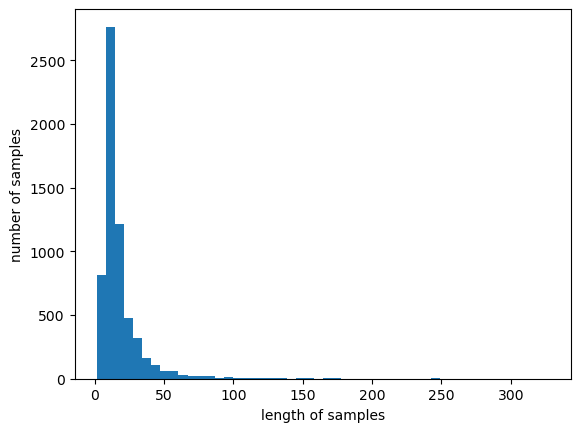

In [36]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [37]:
def below_threshold_len(max_len, nested_list):
    count = 0
    for sentence in nested_list:
        if(len(sentence) <= max_len):
            count = count + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [38]:
max_len = 5
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 5 이하인 샘플의 비율: 0.5222784396931615


In [39]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_val = pad_sequences(X_val, maxlen=max_len)

In [40]:
from tensorflow.keras.layers import Embedding, Dense, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)
mc = ModelCheckpoint('testing_model1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=100, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/100
76/77 [============================>.] - ETA: 0s - loss: 0.5263 - acc: 0.7257
Epoch 1: val_acc improved from -inf to 0.77406, saving model to testing_model1.h5
77/77 [==============================] - 2s 8ms/step - loss: 0.5257 - acc: 0.7270 - val_loss: 0.4895 - val_acc: 0.7741
Epoch 2/100
37/77 [=============>................] - ETA: 0s - loss: 0.3645 - acc: 0.8383

/Users/sungahwang/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/77 [===========================>..] - ETA: 0s - loss: 0.3922 - acc: 0.8162
Epoch 2: val_acc improved from 0.77406 to 0.77732, saving model to testing_model1.h5
77/77 [==============================] - 0s 5ms/step - loss: 0.3918 - acc: 0.8182 - val_loss: 0.4764 - val_acc: 0.7773
Epoch 3/100
76/77 [============================>.] - ETA: 0s - loss: 0.3459 - acc: 0.8456
Epoch 3: val_acc did not improve from 0.77732
77/77 [==============================] - 0s 6ms/step - loss: 0.3454 - acc: 0.8462 - val_loss: 0.4873 - val_acc: 0.7724
Epoch 4/100
71/77 [==========================>...] - ETA: 0s - loss: 0.3207 - acc: 0.8669
Epoch 4: val_acc did not improve from 0.77732
77/77 [==============================] - 0s 5ms/step - loss: 0.3201 - acc: 0.8672 - val_loss: 0.5091 - val_acc: 0.7724
Epoch 5/100
76/77 [============================>.] - ETA: 0s - loss: 0.3019 - acc: 0.8719
Epoch 5: val_acc did not improve from 0.77732
77/77 [==============================] - 0s 5ms/step - loss: 0.3017 - ac

In [41]:
loaded_model = load_model('testing_model1.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_val, y_val)[1]))

64/64 [==============================] - 0s 3ms/step - loss: 0.4519 - acc: 0.7758

 테스트 정확도: 0.7758


In [42]:
def sentiment_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    print(score* 100)
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [43]:
sentiment_predict('이 상품 진짜 좋아요... 저는 강추합니다. 대박')

1/1 [==============================] - 0s 131ms/step
99.59560036659241
99.60% 확률로 긍정 리뷰입니다.


In [44]:
sentiment_predict('그냥 스파브랜드 급 저퀄리티 니트 크게 기대하지는 마셈 세탁한번하면 다 줄어듬')

1/1 [==============================] - 0s 8ms/step
21.64568305015564
78.35% 확률로 부정 리뷰입니다.


In [45]:
sentiment_predict('별로에요')

1/1 [==============================] - 0s 8ms/step
14.754137396812439
85.25% 확률로 부정 리뷰입니다.


In [46]:
sentiment_predict('핏이 아쉽네요')

1/1 [==============================] - 0s 8ms/step
0.5656603258103132
99.43% 확률로 부정 리뷰입니다.


In [47]:
sentiment_predict('가성비로 최고입니다.워셔블이라서 세탁기에 막 돌려도 되고원단도 부드럽고 탄탄하이 좋습니다.')

1/1 [==============================] - 0s 7ms/step
96.50183916091919
96.50% 확률로 긍정 리뷰입니다.


In [48]:
sentiment_predict('재질도 좋고 싸게 잘 사서 좋은거 같아요.지금 날씨에는 좀 추울 수 있습니다.')

1/1 [==============================] - 0s 7ms/step
71.42448425292969
71.42% 확률로 긍정 리뷰입니다.


# test data로 결과 확인

## 통합

In [49]:
test_data = pd.read_csv('data/final//test_data.csv')
test_data

,Type,Rate,Review
0,화이트 멜란지/XL,4,178/76 기준으로 L 사이즈는 좀 작아서 XL로 다시 시켰더니 딱 맞습니다. 두...
1,오트밀/XL,5,생각보다 작습니다. 제 스펙이면 무조건 XL 가셔야 하고 팔 길이도 딱 손목시계 차...
2,화이트 멜란지/L,5,색감은 연한 그레이색감인데 화이트가 군데군데 들어가서 좀더 밝은색감이 예쁘네요. 핏...
3,오트밀/M,5,좋은 제품이네요. 여자친구가 잘 샀다고 칭찬해줬어요.일단 옷감도 괜찮고 두툼하니 겨...
4,오트밀/M,5,자인도 이쁘고 따뜻해서 겨울에 입기 좋을거 같아영
...,...,...,...
11986,퓨어 블랙/L,5,사이즈 너무 잘 맞고 이뻐요! 아직 낮에는 좀 덥지만 선선해지면 잘 입을꺼같아요 !...
11987,퓨어 블랙/M,5,아직 입기는 조금 더운 날씨이지만 아침 저녁으로 입으면 따뜻하고 좋아요
11988,콘크리트 그레이/L,5,이가격에 하프집업니트 좋아요 근데 세탁기에 돌려도 되는지 모르겠네요
11989,콘크리트 그레이/L,5,어디에나 잘 어울리는 상의입니다.재질도 독톡하고 아주 좋습니다.품도 넉넉해서 요즘 ...


In [50]:
l = []
for i in range(0, len(test_data['Review'])):
    l.append(test_data["Review"][i])

In [51]:
a = 0
for i in range(0, len(l)):
    new_sentence = l[i]
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    a = a + score
    
a = a /len(l)

if(a > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(a * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - a) * 100))

1/1 [==============================] - 0s 7ms/step
68.95% 확률로 긍정 리뷰입니다.


## 키워드 별

In [52]:
import warnings
warnings.filterwarnings(action='ignore')

test_data['색감'] = '0'
test_data['핏'] = '0'
test_data['디자인'] = '0'
test_data['가격'] = '0'
test_data['재질'] = '0'
test_data['배송'] = '0'

In [53]:
색감_result = test_data.query('Review.str.contains("색감|색상|오트밀|그레이|색|색도|색깔|블랙|회색|블루|아이보리|흰색|컬러|채도|명도|어두운|파란색|연한|화이트|멜란지|검정|연한")', engine='python')
색감_list = list(set(list(색감_result['Review'])))
for i in range(0, len(test_data['Review'])):
    if l[i] in 색감_list:
        test_data['색감'][i] = test_data['색감'][i].replace('0', '1')
        
print(test_data['색감'].value_counts())


핏_result = test_data.query('Review.str.contains("사이즈|핏|기장|길이|폼|소매|핏감|루즈|루즈핏|널널|스펙|정사|이즈|라지|활용|체형|키|정핏|실루엣|와이드|흐물흐물|몸무게|분위기|넥라인|넥부분")', engine='python')
핏_list = list(set(list(핏_result['Review'])))
for i in range(0, len(test_data['Review'])):
    if l[i] in 핏_list:
        test_data['핏'][i] = test_data['핏'][i].replace('0', '1')
        
print(test_data['핏'].value_counts())


디자인_result = test_data.query('Review.str.contains("디자인|스타일|심플|트렌드|트랜디|연출|코디|스탠다드|유행|꾸안꾸룩|데님|네추럴|트렌디|무드|휘뚜르|마뚜르|매치|매칭")', engine='python')
디자인_list = list(set(list(디자인_result['Review'])))
for i in range(0, len(test_data['Review'])):
    if l[i] in 디자인_list:
        test_data['디자인'][i] = test_data['디자인'][i].replace('0', '1')
        
print(test_data['디자인'].value_counts())


가격_result = test_data.query('Review.str.contains("가격|가성|할인|가성비|블프|블랙프라이데이")', engine='python')
가격_list = list(set(list(가격_result['Review'])))
for i in range(0, len(test_data['Review'])):
    if l[i] in 가격_list:
        test_data['가격'][i] = test_data['가격'][i].replace('0', '1')
        
print(test_data['가격'].value_counts())


재질_result = test_data.query('Review.str.contains("재질|두께|촉감|따뜻|퀄리티|보풀|소재|원단|니트|집업|겨울|가을|지퍼|품질|마감|실밥|밑단|옷감|까슬까슬|부드러움|관리|세탁|줄어듬|먼지|쫀쫀|보온|무게|한겨울|냄새|건조기|짜임새|기모|감촉|싸구려")', engine='python')
재질_list = list(set(list(재질_result['Review'])))
for i in range(0, len(test_data['Review'])):
    if l[i] in 재질_list:
        test_data['재질'][i] = test_data['재질'][i].replace('0', '1')
        
print(test_data['재질'].value_counts())


배송_result = test_data.query('Review.str.contains("배송|포장|교환|딜레이|검수|불량|불량품|서비스|주문|반품")', engine='python')
배송_list = list(set(list(배송_result['Review'])))
for i in range(0, len(test_data['Review'])):
    if l[i] in 배송_list:
        test_data['배송'][i] = test_data['배송'][i].replace('0', '1')
        
print(test_data['배송'].value_counts())

0    9002
1    2989
Name: 색감, dtype: int64
0    7567
1    4424
Name: 핏, dtype: int64
0    10901
1     1090
Name: 디자인, dtype: int64
0    9945
1    2046
Name: 가격, dtype: int64
0    6672
1    5319
Name: 재질, dtype: int64
0    11412
1      579
Name: 배송, dtype: int64


In [54]:
test_data_색감 = test_data[test_data['색감'] == '1'].reset_index(drop = True)
test_data_핏 = test_data[test_data['핏'] == '1'].reset_index(drop = True)
test_data_디자인 = test_data[test_data['디자인'] == '1'].reset_index(drop = True)
test_data_가격 = test_data[test_data['가격'] == '1'].reset_index(drop = True)
test_data_재질 = test_data[test_data['재질'] == '1'].reset_index(drop = True)
test_data_배송 = test_data[test_data['배송'] == '1'].reset_index(drop = True)

In [55]:
l_색감 = []
for i in range(0, len(test_data_색감['Review'])):
    l_색감.append(test_data_색감["Review"][i])

b = 0
for i in range(0, len(l_색감)):
    new_sentence = l_색감[i]
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    b = b + score
    
b = b /len(l_색감)

if(b > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(b * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - b) * 100))

1/1 [==============================] - 0s 9ms/step
73.18% 확률로 긍정 리뷰입니다.


In [56]:
l_핏 = []
for i in range(0, len(test_data_핏['Review'])):
    l_핏.append(test_data_핏["Review"][i])

c = 0
for i in range(0, len(l_핏)):
    new_sentence = l_핏[i]
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    c = c + score
    
c = c /len(l_핏)

if(c > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(c * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - c) * 100))

1/1 [==============================] - 0s 8ms/step
68.10% 확률로 긍정 리뷰입니다.


In [57]:
l_디자인 = []
for i in range(0, len(test_data_디자인['Review'])):
    l_디자인.append(test_data_디자인["Review"][i])

d = 0
for i in range(0, len(l_디자인)):
    new_sentence = l_디자인[i]
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    d = d + score
    
d = d /len(l_디자인)

if(d > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(d * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - d) * 100))

1/1 [==============================] - 0s 7ms/step
70.32% 확률로 긍정 리뷰입니다.


In [58]:
l_가격 = []
for i in range(0, len(test_data_가격['Review'])):
    l_가격.append(test_data_가격["Review"][i])

e = 0
for i in range(0, len(l_가격)):
    new_sentence = l_가격[i]
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    e = e + score
    
e = e /len(l_가격)

if(e > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(e * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - e) * 100))

1/1 [==============================] - 0s 8ms/step
67.93% 확률로 긍정 리뷰입니다.


In [59]:
l_재질 = []
for i in range(0, len(test_data_재질['Review'])):
    l_재질.append(test_data_재질["Review"][i])

f = 0
for i in range(0, len(l_재질)):
    new_sentence = l_재질[i]
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    f = f + score
    
f = f /len(l_재질)

if(f > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(f * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - f) * 100))

1/1 [==============================] - 0s 7ms/step
69.62% 확률로 긍정 리뷰입니다.


In [60]:
l_배송 = []
for i in range(0, len(test_data_배송['Review'])):
    l_배송.append(test_data_배송["Review"][i])

g = 0
for i in range(0, len(l_배송)):
    new_sentence = l_배송[i]
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
    new_sentence = okt.morphs(new_sentence)
    new_sentence = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = max_len)
    score = float(loaded_model.predict(pad_new))
    g = g + score
    
g = g /len(l_배송)

if(f > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(g * 100))
else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - g) * 100))

1/1 [==============================] - 0s 7ms/step
62.63% 확률로 긍정 리뷰입니다.


In [61]:
final_score = {'색감': '{:.2f}%'.format(b * 100) ,'핏': '{:.2f}%'.format(c * 100), '디자인': '{:.2f}%'.format(d * 100),
               '가격': '{:.2f}%'.format(e * 100),'재질': '{:.2f}%'.format(f * 100),'배송': '{:.2f}%'.format(g * 100)}
final_score

{'색감': '73.18%',
 '핏': '68.10%',
 '디자인': '70.32%',
 '가격': '67.93%',
 '재질': '69.62%',
 '배송': '62.63%'}